Modelo YOLOv8 cargado con éxito.
--2025-10-31 14:03:38--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168949 (165K) [image/jpeg]
Saving to: ‘example_traffic.jpg’

example_traffic.jpg 100%[===================>] 164.99K  --.-KB/s    in 0.03s   

2025-10-31 14:03:38 (5.78 MB/s) - ‘example_traffic.jpg’ saved [168949/168949]


image 1/1 /Users/rasec/Documents/github/Proyecto de Tesis/CerebroVial/notebooks/example_traffic.jpg: 384x640 2 persons, 1 tie, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


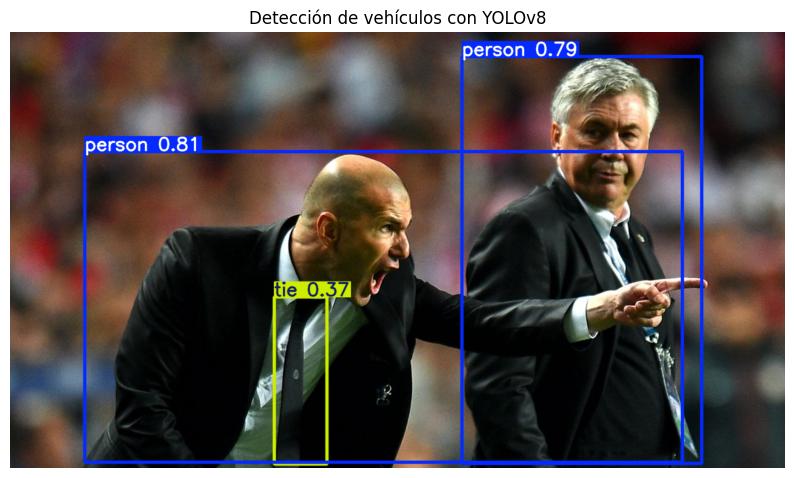

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# 1. Descargar o cargar un modelo pre-entrenado YOLOv8
# 'yolov8n.pt' es la versión 'nano' (más pequeña y rápida, buena para empezar)
# Puedes usar 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt' o 'yolov8x.pt' para modelos más grandes y precisos.
model = YOLO('yolov8n.pt') 

print("Modelo YOLOv8 cargado con éxito.")

# 2. Descargar una imagen de ejemplo (o usar una tuya)
# Puedes colocar una imagen en tu carpeta 'data/' o descargarla.
# Para este ejemplo, descargaremos una directamente
!wget -O example_traffic.jpg https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg # Cambia a una imagen de tráfico si quieres
# Si tienes una imagen de tráfico, por ejemplo en data/traffic_sample.jpg
# img_path = 'data/traffic_sample.jpg'
img_path = 'example_traffic.jpg' 

if not os.path.exists(img_path):
    print(f"Error: La imagen de ejemplo '{img_path}' no se encontró. Asegúrate de que exista o descarga una imagen de tráfico.")
else:
    # 3. Realizar inferencia en la imagen
    results = model(img_path)

    # 4. Procesar y mostrar los resultados
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB) # Convertir BGR a RGB para matplotlib

        plt.figure(figsize=(10, 8))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title("Detección de vehículos con YOLOv8")
        plt.show()

        # Opcional: Imprimir las detecciones en texto
        for box in r.boxes:
            class_id = int(box.cls)
            class_name = model.names[class_id]
            confidence = box.conf.item()
            # Si quieres filtrar solo por vehículos, necesitarás saber los IDs de clase.
            # Los IDs para vehículos en COCO suelen ser:
            # 2: car, 3: motorcycle, 5: bus, 7: truck
            if class_name in ['car', 'motorcycle', 'bus', 'truck', 'bicycle']:
                print(f"Clase: {class_name}, Confianza: {confidence:.2f}, BBox: {box.xyxy.cpu().numpy().tolist()}")